In [22]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error

In [23]:
X_train = pd.read_excel('Database-settlement.xlsx', sheet_name=1).drop('Ring No.', axis=1)
X_test = pd.read_excel('Database-settlement.xlsx', sheet_name=2).drop('Ring No.', axis=1)


In [24]:
X = pd.concat([X_train, X_test]).sort_index()
y = X['S']

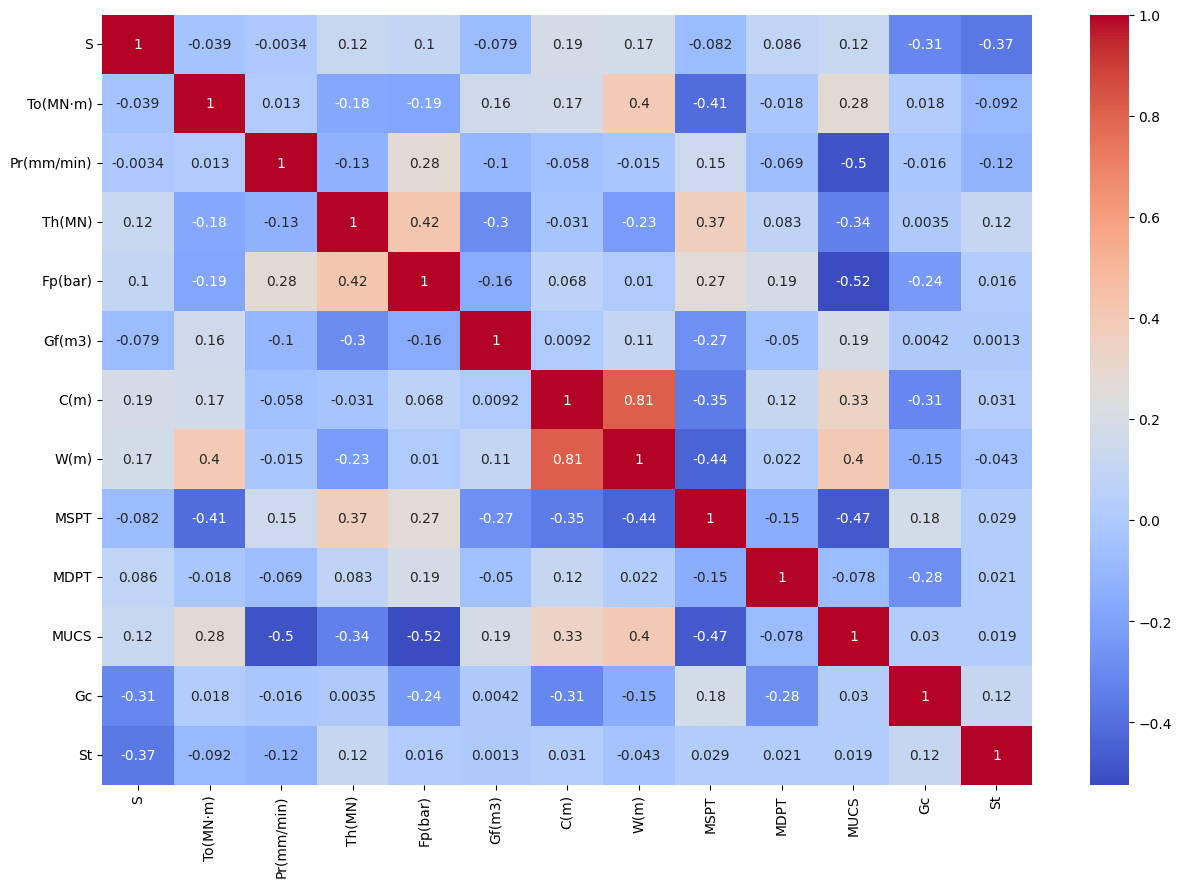

In [25]:
import seaborn as sns
corr_matrix = X.corr(method='pearson')
plt.figure(figsize=(15, 10),)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')      
plt.show()


Note:	
To	Torque
Pr	penetration rate
Th	Thrust
Fp	Face pressure
Gf	Grouting ratio
C	Cover depth
W	Water table
MSPT	Modified standard penetration test
MDPT	Modified dynamic penetration test
MUCS	Modified uniaxial compressive strength
Gc	Ground condition at the tunnel face
St	Stoppage

In [26]:
X_train.describe()

,S,To(MN·m),Pr(mm/min),Th(MN),Fp(bar),Gf(m3),C(m),W(m),MSPT,MDPT,MUCS,Gc,St
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,-4.376130,2.394453,23.098006,13.127730,1.084680,6.024153,17.452669,11.804237,6.732837,0.397486,6.847549,3.016949,0.093220
std,5.846818,0.801576,9.541879,3.769969,0.523534,0.957506,3.355337,4.446147,8.464396,1.405612,8.152968,0.460953,0.291359
min,-31.630000,0.285000,2.414493,7.000000,0.000000,4.000000,9.100000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,-5.155000,1.886419,16.798246,10.475000,0.700000,6.000000,15.487500,9.500000,1.064553,0.000000,0.206711,3.000000,0.000000
50%,-2.795000,2.369223,25.370092,12.400000,1.100000,6.000000,16.800000,11.450000,3.202518,0.000000,2.469678,3.000000,0.000000
75%,-0.855000,3.000000,29.411765,15.480870,1.500000,6.500000,20.400000,14.700000,7.752042,0.000000,13.681721,3.000000,0.000000
max,3.050000,4.700000,45.833333,24.200000,2.500000,13.100000,26.350000,20.300000,38.715750,12.443165,36.304800,4.000000,1.000000


In [27]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [28]:
X_train.columns

Index(['S', 'To(MN·m)', 'Pr(mm/min)', 'Th(MN)', 'Fp(bar)', 'Gf(m3)', 'C(m)',
       'W(m)', 'MSPT', 'MDPT', 'MUCS', 'Gc', 'St'],
      dtype='object')

In [29]:
y_train = X_train['S']
y_test = X_test['S']

In [30]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)


In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
rf_cv_r2 = []
xgb_cv_r2 = []
rf_cv_rmse = []
xgb_cv_rmse = []
# kfold = KFold(n_splits=10))
scoring = ['r2', 'neg_root_mean_squared_error']
rf_cv_results = cross_validate(rf_model, X_train, y_train, cv=10, scoring=scoring)
xgb_cv_results = cross_validate(xgb_model, X_train, y_train, cv=10, scoring=scoring)
# Print results for each scoring metric
rf_cv_r2 = rf_cv_results['test_r2']
rf_cv_rmse = -1* rf_cv_results['test_neg_root_mean_squared_error']
xgb_cv_r2 = xgb_cv_results['test_r2']
xgb_cv_rmse = -1* xgb_cv_results['test_neg_root_mean_squared_error']
# Corrected print statements
print(f"RF: {rf_cv_r2.mean():.4f}, {rf_cv_rmse.mean():.4f}")
print(f"XgBoost: {xgb_cv_r2.mean():.4f}, {xgb_cv_rmse.mean():.4f}")

RF: 0.9939, 0.3663
XgBoost: 0.9903, 0.4257


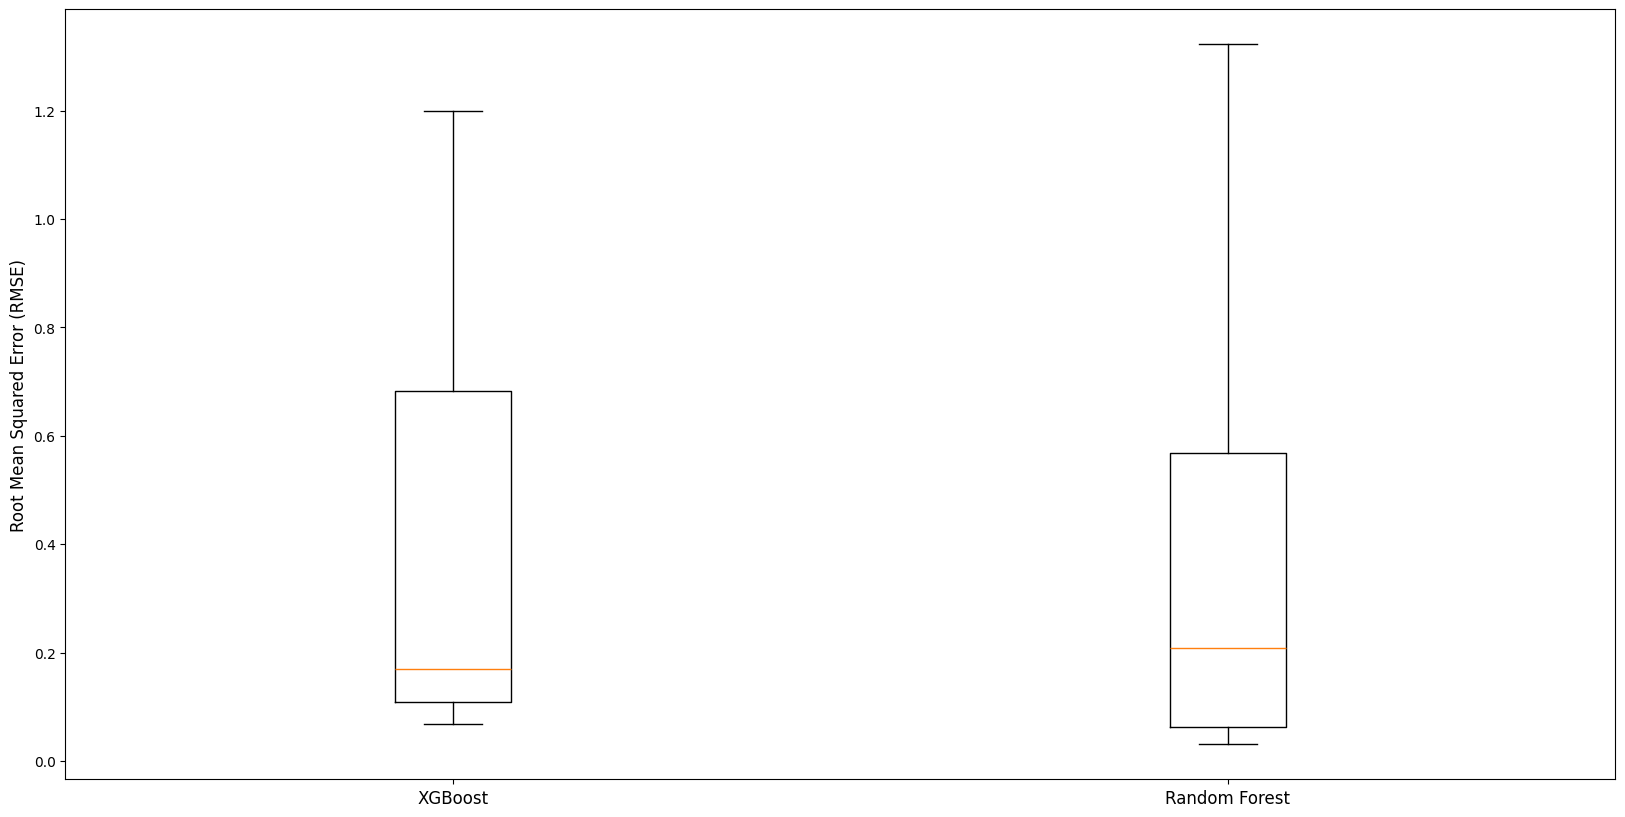

In [32]:

plt.figure(figsize=(20, 10))  
rmse = pd.concat([pd.DataFrame(xgb_cv_rmse), pd.DataFrame(rf_cv_rmse)], axis=1)
plt.boxplot(rmse, patch_artist=False, showfliers=True)
plt.ylabel('Root Mean Squared Error (RMSE)',fontsize=12)
plt.xticks([1, 2], ['XGBoost', 'Random Forest'], fontsize=12)
plt.show()

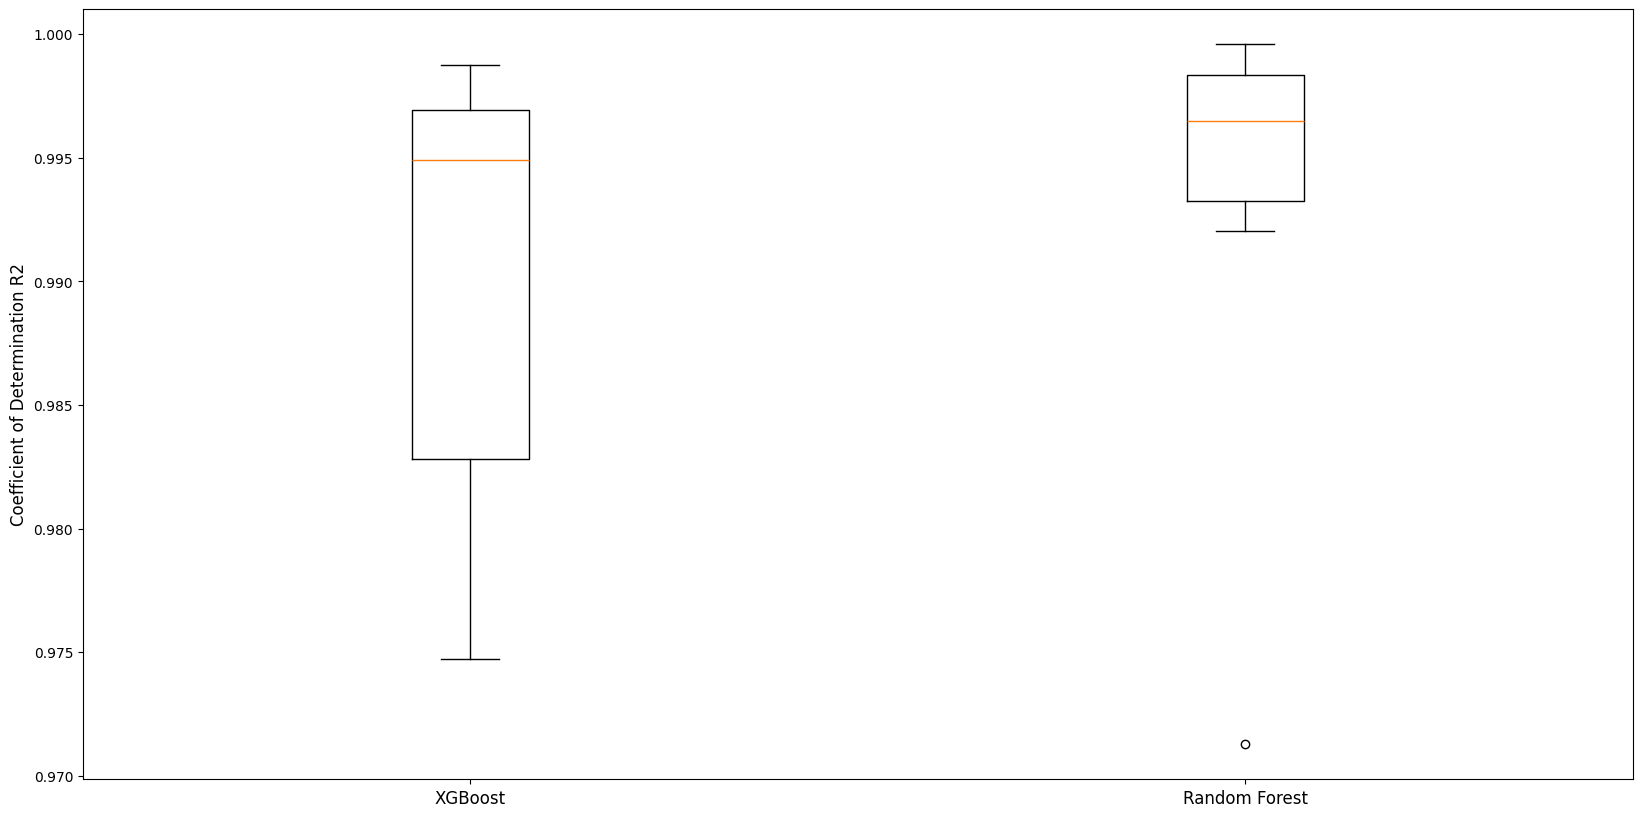

In [33]:
plt.figure(figsize=(20, 10))  # Set the figure size
r2 = pd.concat([pd.DataFrame(xgb_cv_r2), pd.DataFrame(rf_cv_r2)], axis=1)
plt.boxplot(r2, patch_artist=False, showfliers=True)
plt.ylabel('Coefficient of Determination R2',fontsize=12)
plt.xticks([1, 2], ['XGBoost', 'Random Forest'], fontsize=12)  # Set numerical positions and labels
plt.show()

In [34]:
rf_model.fit(X_train,y_train)   
rf_y_train = rf_model.predict(X_train)
rf_y_pred = rf_model.predict(X_test)
print('RF_RMSE:', root_mean_squared_error(y_test, rf_y_pred))
print('RF_ r2:', r2_score(y_test, rf_y_pred))

RF_RMSE: 2.3003676878668338
RF_ r2: 0.8960544308835982


In [35]:
xgb_model.fit(X_train,y_train)
xgb_y_train = xgb_model.predict(X_train)
xgb_y_pred = xgb_model.predict(X_test)
print('Xgb_RMSE:', root_mean_squared_error(y_test, xgb_y_pred))
print('Xgb_ r2:', r2_score(y_test, xgb_y_pred))

Xgb_RMSE: 1.9652800691127223
Xgb_ r2: 0.9241316981065582


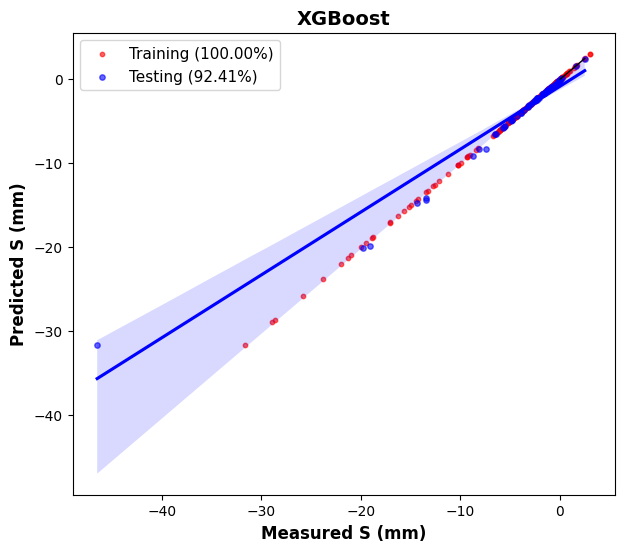

In [36]:
import seaborn as sns
plt.figure(figsize=(7, 6))

# Plot Training Data (Red)
plt.scatter(y_train, xgb_y_train, color='red', s=10, label=f"Training ({r2_score(y_train,xgb_y_train):.2%})", alpha=0.6)

# Plot Testing Data (Blue)
plt.scatter(y_test, xgb_y_pred, color='blue', s=15, label=f"Testing ({r2_score(y_test,xgb_y_pred):.2%})", alpha=0.6)

# Identity Line (y = x)
x_line = np.linspace(0, max(y_test), 100)
plt.plot(x_line, x_line, color="black", linestyle="solid", linewidth=1)

# Regression Line (For Test Data)
sns.regplot(x=y_test, y=rf_y_pred, scatter=False, color="blue", ci=95)

# Labels and Title
plt.xlabel("Measured S (mm)", fontsize=12, fontweight="bold")
plt.ylabel("Predicted S (mm)", fontsize=12, fontweight="bold")
plt.title("XGBoost", fontsize=14, fontweight="bold")


# Customize Legend
plt.legend(loc="upper left", fontsize=11)

# Show the plot
plt.show()


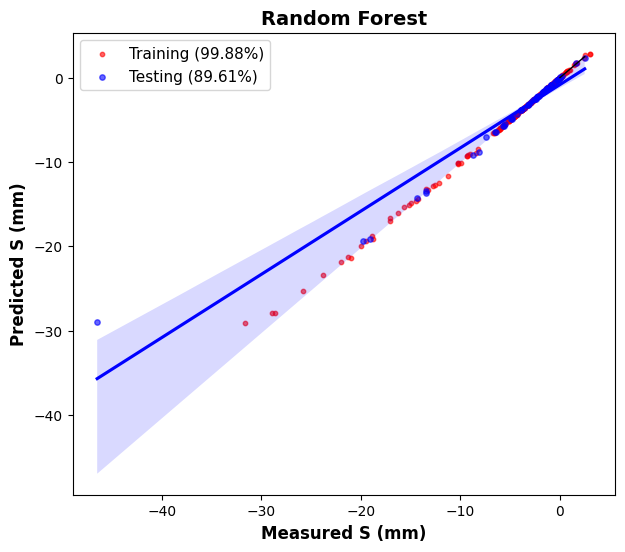

In [37]:
import seaborn as sns
plt.figure(figsize=(7, 6))

# Plot Training Data (Red)
plt.scatter(y_train, rf_y_train, color='red', s=10, label=f"Training ({r2_score(y_train,rf_y_train):.2%})", alpha=0.6)

# Plot Testing Data (Blue)
plt.scatter(y_test, rf_y_pred, color='blue', s=15, label=f"Testing ({r2_score(y_test,rf_y_pred):.2%})", alpha=0.6)

# Identity Line (y = x)
x_line = np.linspace(0, max(y_test), 100)
plt.plot(x_line, x_line, color="black", linestyle="solid", linewidth=1)

# Regression Line (For Test Data)
sns.regplot(x=y_test, y=rf_y_pred, scatter=False, color="blue", ci=95)

# Labels and Title
plt.xlabel("Measured S (mm)", fontsize=12, fontweight="bold")
plt.ylabel("Predicted S (mm)", fontsize=12, fontweight="bold")
plt.title("Random Forest", fontsize=14, fontweight="bold")


# Customize Legend
plt.legend(loc="upper left", fontsize=11)

# Show the plot
plt.show()


<Figure size 1500x1000 with 0 Axes>

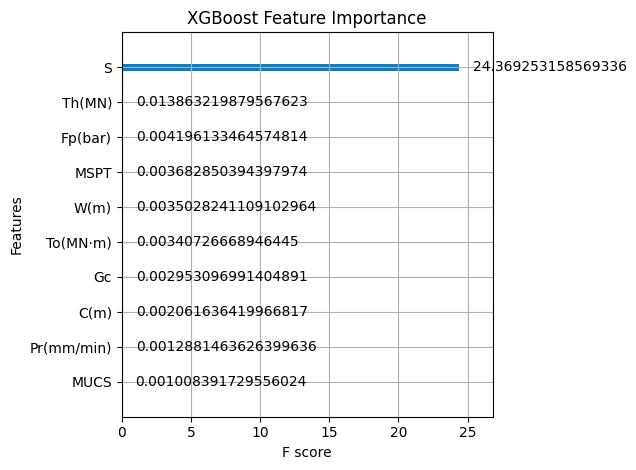

In [38]:
from xgboost import plot_importance
plt.figure(figsize=(15, 10))
plot_importance(xgb_model, importance_type='gain', max_num_features=10)
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()